In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
customer_data = pd.read_csv("file.csv")
print(customer_data.head())

   Unnamed: 0  CustomerID Gender Location  Tenure_Months  Transaction_ID  \
0           0     17850.0      M  Chicago           12.0         16679.0   
1           1     17850.0      M  Chicago           12.0         16680.0   
2           2     17850.0      M  Chicago           12.0         16696.0   
3           3     17850.0      M  Chicago           12.0         16699.0   
4           4     17850.0      M  Chicago           12.0         16700.0   

  Transaction_Date     Product_SKU  \
0       2019-01-01  GGOENEBJ079499   
1       2019-01-01  GGOENEBJ079499   
2       2019-01-01  GGOENEBQ078999   
3       2019-01-01  GGOENEBQ079099   
4       2019-01-01  GGOENEBJ079499   

                                 Product_Description Product_Category  ...  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA  ...   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA  ...   
2             Nest Cam Outdoor Security Camera - USA         Nest-USA  ...   
3 

In [6]:
customer_cluster_data = customer_data.groupby('CustomerID').agg(
    Total_Spend=('Offline_Spend', 'sum'),
    Total_Transactions=('Transaction_ID', 'count')
).dropna().reset_index()

In [7]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
customer_cluster_data['Cluster'] = kmeans.fit_predict(customer_cluster_data[['Total_Spend', 'Total_Transactions']])

In [9]:
cluster_0 = customer_cluster_data[customer_cluster_data['Cluster'] == 0]['Total_Spend']
cluster_1 = customer_cluster_data[customer_cluster_data['Cluster'] == 1]['Total_Spend']
t_stat, p_value = ttest_ind(cluster_0, cluster_1, equal_var=False)
print(cluster_0)
print(cluster_1)
print(t_stat,p_value)

0         6000.0
1       120000.0
2        74500.0
3        68000.0
4       108000.0
          ...   
1462      8000.0
1463     17500.0
1464    125500.0
1465     21000.0
1466      3500.0
Name: Total_Spend, Length: 1234, dtype: float64
26      587000.0
30      252500.0
33      375500.0
34      434000.0
46      251000.0
          ...   
1430    186500.0
1432    416000.0
1433    766500.0
1435    332000.0
1467    300000.0
Name: Total_Spend, Length: 226, dtype: float64
-29.034334729611945 5.866845440683609e-80


In [11]:
print(customer_cluster_data.head())
print(f"T-statistic: {t_stat}, P-value: {p_value}")

   CustomerID  Total_Spend  Total_Transactions  Cluster
0     12346.0       6000.0                   2        0
1     12347.0     120000.0                  60        0
2     12348.0      74500.0                  23        0
3     12350.0      68000.0                  17        0
4     12356.0     108000.0                  36        0
T-statistic: -29.034334729611945, P-value: 5.866845440683609e-80


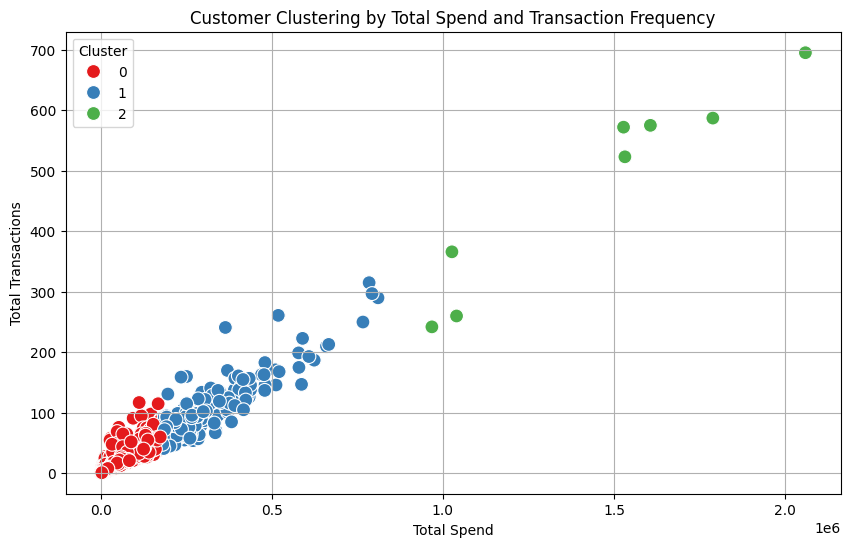

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Total_Spend', y='Total_Transactions', hue='Cluster',
    data=customer_cluster_data, palette='Set1', s=100
)
plt.title('Customer Clustering by Total Spend and Transaction Frequency')
plt.xlabel('Total Spend')
plt.ylabel('Total Transactions')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()